In [6]:
import Pkg;
Pkg.add("Flux")

    Updating registry at `C:\Users\Sumit Singh\.julia\registries\General.toml`
   Resolving package versions...
   Installed ContextVariablesX ────── v0.1.3
   Installed cuDNN ────────────────── v1.0.2
   Installed FunctionWrappers ─────── v1.1.3
   Installed NNlibCUDA ────────────── v0.2.7
   Installed Accessors ────────────── v0.1.28
   Installed CUDA_Runtime_jll ─────── v0.5.0+2
   Installed BFloat16s ────────────── v0.4.2
   Installed ShowCases ────────────── v0.1.0
   Installed Optimisers ───────────── v0.2.18
   Installed PrettyPrint ──────────── v0.2.0
   Installed MLUtils ──────────────── v0.4.1
   Installed RandomNumbers ────────── v1.5.3
   Installed NNlib ────────────────── v0.8.20
   Installed Functors ─────────────── v0.4.4
   Installed CUDA_Driver_jll ──────── v0.5.0+1
   Installed FLoopsBase ───────────── v0.1.1
   Installed CUDA_Runtime_Discovery ─ v0.2.2
   Installed ProgressLogging ──────── v0.1.4
   Installed OneHotArrays ─────────── v0.2.3
   Installed NameResolutio

In [2]:
#getting libraries
using Distributions
using Distances
using Random
using Plots
using Statistics
using Flux
using TSPLIB

In [3]:
# 2d-world
n=7 # cities

# create n cities in a 1x1 square
x = rand(2,n) 

println(x)
# compute Euclidean distance between cities 
distances=pairwise(Euclidean(), x, dims=2)

[0.12382390198080073 0.935707723425181 0.13336730279640585 0.1710681160240638 0.7755295181609309 0.7509572833875681 0.6361694289247217; 0.6873402796293456 0.7815437078376797 0.9494263555469712 0.774293027841834 0.4210927227267457 0.6107808139175459 0.8920756075111501]


7×7 Matrix{Float64}:
 0.0        0.817331  0.26226   0.0989586  0.703994  0.631789  0.551738
 0.817331   0.0       0.819716  0.764674   0.394439  0.25158   0.319281
 0.26226    0.819716  0.0       0.179145   0.83157   0.704342  0.506062
 0.0989586  0.764674  0.179145  0.0        0.700089  0.602501  0.479783
 0.703994   0.394439  0.83157   0.700089   0.0       0.191273  0.491168
 0.631789   0.25158   0.704342  0.602501   0.191273  0.0       0.303814
 0.551738   0.319281  0.506062  0.479783   0.491168  0.303814  0.0

In [14]:
tsp = readTSPLIB(:burma14)
distances = tsp.weights
println(distances)

# 2d-world
n=tsp.dimension # cities
println("# of cities: ", n)

# optimal value
println("Optimal value: ", tsp.optimal)

[1.0 153.0 510.0 706.0 966.0 581.0 455.0 70.0 160.0 372.0 157.0 567.0 342.0 398.0; 153.0 1.0 422.0 664.0 997.0 598.0 507.0 197.0 311.0 479.0 310.0 581.0 417.0 376.0; 510.0 422.0 1.0 289.0 744.0 390.0 437.0 491.0 645.0 880.0 618.0 374.0 455.0 211.0; 706.0 664.0 289.0 1.0 491.0 265.0 410.0 664.0 804.0 1070.0 768.0 259.0 499.0 310.0; 966.0 997.0 744.0 491.0 1.0 400.0 514.0 902.0 990.0 1261.0 947.0 418.0 635.0 636.0; 581.0 598.0 390.0 265.0 400.0 1.0 168.0 522.0 634.0 910.0 593.0 19.0 284.0 239.0; 455.0 507.0 437.0 410.0 514.0 168.0 1.0 389.0 482.0 757.0 439.0 163.0 124.0 232.0; 70.0 197.0 491.0 664.0 902.0 522.0 389.0 1.0 154.0 406.0 133.0 508.0 273.0 355.0; 160.0 311.0 645.0 804.0 990.0 634.0 482.0 154.0 1.0 276.0 43.0 623.0 358.0 498.0; 372.0 479.0 880.0 1070.0 1261.0 910.0 757.0 406.0 276.0 1.0 318.0 898.0 633.0 761.0; 157.0 310.0 618.0 768.0 947.0 593.0 439.0 133.0 43.0 318.0 1.0 582.0 315.0 464.0; 567.0 581.0 374.0 259.0 418.0 19.0 163.0 508.0 623.0 898.0 582.0 1.0 275.0 221.0; 342.0

In [13]:
path = "C:\\Users\\Sumit Singh\\Desktop\\NCSU\\Spring 2023\\CSC 591 Metaheuristics\\Project\\Code\\Art2k.tsp"
tsp = readTSP(path)

distances = tsp.weights

n=tsp.dimension # cities
println("# of cities: ", n)

# of cities: 2000


In [4]:
# Define a function to calculate the cumulative probabilities
function cum_probabilities(solution, tour, distances)
    # Initialize an array of zeros to store the probabilities
    probs = zeros(length(solution))
    
    # Calculate the probabilities for each city
    for i in 1:length(solution)
        if i ∉ tour
            probs[i] = (solution[i])  * (1/distances[tour[end], i])
        end
    end
    
    probs /= sum(probs)
    
    # Calculate the cumulative probabilities
    cum_probs = cumsum(probs)
    
    return cum_probs
end


cum_probabilities (generic function with 1 method)

In [5]:
# Define a function to select the next city based on the probabilities
function select_city(cum_probs)
    # Generate a random number between 0 and 1
    r = rand()
    
    #println("random value: ", r)
    # Find the index of the first cumulative probability that is greater than r
    index = findfirst(cum_probs .>= r)
    #println("next city: ", index)
    return index
end


select_city (generic function with 1 method)

In [6]:
#generate tour function

function generateTour(solution)
    
    #println("New Tour..")
    # Initialize the tour as an array of zeros
    tour = zeros(Int, n)

    # Set the first city as the one with the smallest value in the solution
    tour[1] = argmin(solution)
    
    # Generate the rest of the tour using the cumulative probabilities
    for i in 2:n
        # Calculate the cumulative probabilities
        cum_probs = cum_probabilities(solution, tour[1:i-1], distances)
        #println("Cum Probs: ", cum_probs)
        #println("Tour so far...: ", tour)
        # Select the next city based on the probabilities
        next_city = select_city(cum_probs)
    
        # Add the next city to the tour
        tour[i] = next_city
    end

    # Print the tour
    #println("The TSP tour is: ", tour)
    return tour
end


generateTour (generic function with 1 method)

In [7]:
function tour_cost(o::Array{Int64,1})
    n=length(o)
    result = distances[o[n],o[1]]
    for i in 1:(n-1)
        result += distances[o[i],o[i+1]]
    end
    return result
end

tour_cost (generic function with 1 method)

In [8]:
# create m random vectors of d dimensions in the range [a,b]
function rand_population_uniform(m, d, a, b)
    return [rand(Uniform(a,b),d) for i in 1:m]
end

rand_population_uniform (generic function with 1 method)

In [9]:
# intensity function

function intensity(N, x, x_prey)
    d = zeros(N)
    S = zeros(N)
    I = zeros(N)
    for i in 1:N-1
        d[i] = euclidean(x[i], x_prey) ^ 2
        S[i] = euclidean(x[i],x[i+1]) ^ 2
    end
    
    d[N] = euclidean(x[N], x_prey)
    S[N] = euclidean(x[N],x[1])
    
    
    
    for i in 1:N
        r2 = rand(Uniform(0,1))
        I[i] = r2 * S[i] / (4 * π * d[i] )
    end
    return I
end

intensity (generic function with 1 method)

In [10]:
# Honey Badger Algorithm

function HBATSP(t_max, N, beta, C, x)
    # t_max = maximum no of iterations
    # N = population size
    # beta = default value as 6
    # C = default value as 2
    # x = initial population
    # obj_func = benchmark function
    # f = fitness of the population
    # x_prey = best position found so far
    # f_prey = best fitness value so far for the x_prey
    # x_new = new position calculated for the ith honey badger
    # f_new = new fitness calculated for the ith honey badger
    # I = intensity of the honey badger
    # F = disturbance direction
    
    #generate tour from initial solution
    
    
    #calucalte the fitness of each honey badger
    tours = generateTour.(x)
    f = tour_cost.(tours)
    println("fitness vecor: ", f)
    
    #save best posiiton and fitness
    f_prey, x_prey_index = findmin(f)
    x_prey = x[x_prey_index]
    t_prey = tours[x_prey_index]
    
    
    println("best solution: ", x_prey, " fitness: ", f_prey,  " tour: ", t_prey)
    #println("fitness: ", f_prey)
    fitness_values = []
    push!(fitness_values,(0,f_prey))
    for t in 1:t_max
        
        #println("iteration: ", t)
        
        #calculate the density factor / decreasing factor
        alpha = C * exp(-t / t_max)
        #println("alpha: ", alpha)
        
        #calcualte the intensity of the all honey badgers
        I = intensity(N, x, x_prey)
        #println("Intensity: ", I)
        
        for i in 1:N
            
            #calcuate distance between prey and ith honey badger
            d = x_prey - x[i]
            
            #generate disturbance
            r6 = rand(Uniform(0,1))
            if r6<=0.5
                F = 1
            else
                F = -1
            end
            
            
            #generate a random value to deicde between digging vs honey mode
            r2 = rand(Uniform(0,1))
            
            #TODO : if intensity is infinite then go for honey mode
            if isinf(I[i])
                r2 = 0.9
            end
            
            if r2<0.5
                # digging mode
                #println("Digging mode")
                r3 = rand(Uniform(0,1))
                r4 = rand(Uniform(0,1))
                r5 = rand(Uniform(0,1))
                #println("Intensity: ", I[i])
                #p = abs(cos(2*π*r4) * (1 - cos(2*π*r5)))
                #println("cos value: ", p)
                x_new = x_prey + (F * beta * I[i] * x_prey) + (F * r3 * alpha * d * abs(cos(2*π*r4) * (1 - cos(2*π*r5))))
                #f_new = obj_func(x_new)
                t_new = generateTour(x_new)
                f_new = tour_cost(t_new)
            
            else
                # honey node
                #println("Honey mode")
                r7 = rand(Uniform(0,1))
                x_new = x_prey + (F * r7 * alpha * d)
                #f_new = obj_func(x_new)
                t_new = generateTour(x_new)
                f_new = tour_cost(t_new)
            end
            
            #TODO: mange xnew to be within the bounds
            
            # evaluate the new posiiton and fitness values
            
            #local position update
            if f_new < f[i]
                #println("local position is improved")
                #println("values", x[i], ";", x_new, ";", f[i], ";", f_new  )
                x[i] = x_new
                f[i] = f_new
                
                #println("local position is improved fin")
            end
            
            #prey position update
            if f_new<f_prey
                println("prey position is improved with honey badger # ", i, " in iteration # ", t)
                x_prey = x_new
                f_prey = f_new
                t_prey = t_new
                println("best solution: ", x_prey, " fitness: ", f_prey,  " tour: ", t_prey)
                push!(fitness_values,(t,f_prey))
            end
            
        end
        #push!(fitness_values,(t,f_prey))
        #println("fitness: ", f_prey)
    end
    return x_prey, f_prey, t_prey, fitness_values 
end
    

HBATSP (generic function with 1 method)

In [16]:
@time begin
#dimensions = # of cities
d = n
#lower bound
a = 0
#upper bound
b = 1
# population size
N = 100
#iterations
t_max = 10000
#constant beta
beta = 6
#constant C
C = 2


x = rand_population_uniform(N, d, a, b )
x_prey, t_prey, f_prey, fitness_values = HBATSP(t_max, N, beta, C, x)

end
println("Best solution: ", x_prey)
println("Best tour: ", t_prey)
println("Best cost: ", f_prey)
println("Fitness values: ", fitness_values)

fitness vecor: [6045.0, 5041.0, 5939.0, 5445.0, 6346.0, 6046.0, 5208.0, 4779.0, 5412.0, 6629.0, 5821.0, 5760.0, 5654.0, 5502.0, 5241.0, 4445.0, 5474.0, 5950.0, 5463.0, 5987.0, 5419.0, 4751.0, 5612.0, 5910.0, 5319.0, 5301.0, 5125.0, 4872.0, 5889.0, 5337.0, 5386.0, 5239.0, 6150.0, 5528.0, 4747.0, 6343.0, 6340.0, 4782.0, 5166.0, 5215.0, 4910.0, 5179.0, 4567.0, 5971.0, 5316.0, 5765.0, 5154.0, 4490.0, 5488.0, 6781.0, 5790.0, 6236.0, 6254.0, 4700.0, 5645.0, 5851.0, 5162.0, 5069.0, 5674.0, 6101.0, 4609.0, 6096.0, 5290.0, 6085.0, 4878.0, 4673.0, 4823.0, 6351.0, 4715.0, 5131.0, 5836.0, 4845.0, 4559.0, 6050.0, 5076.0, 6063.0, 5223.0, 5569.0, 5788.0, 6170.0, 5047.0, 5975.0, 6354.0, 5090.0, 5990.0, 6114.0, 5212.0, 5942.0, 4587.0, 6529.0, 5311.0, 5385.0, 7460.0, 5786.0, 5633.0, 6084.0, 5389.0, 5880.0, 5306.0, 6157.0]
best solution: [0.3993815874768111, 0.7701818103507331, 0.3736500088225049, 0.9272696043160643, 0.42591347427896487, 0.08933336882096765, 0.5407704293080828, 0.7654644439005289, 0.4986

In [41]:
using Random
using Luxor

function draw_tsp(x,o,n,size=1000,radius=5)
    Drawing(size, size, "TSP.png")
    stretch=Int64(0.9size)
    origin(Int64(0.05size),Int64(0.05size))
    # draw cities
    for i in 1:n
        A=Point(stretch*x[1,i],stretch*x[2,i])
        circle(A, radius, :fill)
        label("city $i", :S, A)
    end
    # connect cities by edges
    for i in 1:n-1
        A=Point(stretch*x[1,o[i]],stretch*x[2,o[i]])
        B=Point(stretch*x[1,o[i+1]],stretch*x[2,o[i+1]])
        line(A, B, :stroke)
    end
    # return to first city
    A=Point(stretch*x[1,o[n]],stretch*x[2,o[n]])
    B=Point(stretch*x[1,o[1]],stretch*x[2,o[1]])
    line(A, B, :stroke)
    finish()
    preview()
end

draw_tsp (generic function with 3 methods)

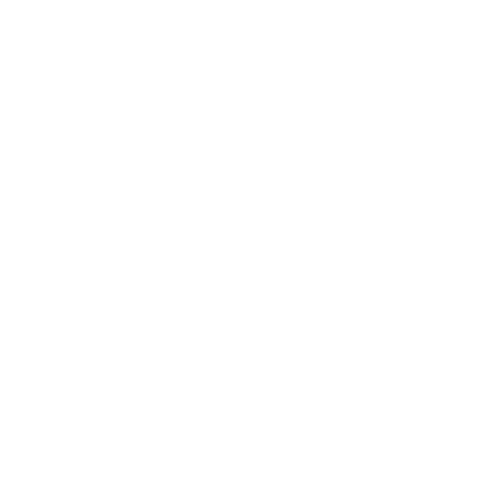

In [43]:
x = tsp.nodes
draw_tsp(transpose(x), f_prey, size(x,2), 500, 5)

In [40]:
x = tsp.nodes
println(x[1,2])

21.52


In [37]:
m = rand(14,2)

m = transpose(m)

2×14 transpose(::Matrix{Float64}) with eltype Float64:
 0.1793    0.0824919  0.117398  0.58221   …  0.768315  0.355108  0.906172
 0.584558  0.915028   0.508695  0.228033     0.431385  0.423476  0.0102906

In [29]:
a = zeros()

2×14 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0